# EDA para el proyecto de ML de detección de spam parte español (es)

### El origen de los datos es:
https://huggingface.co/datasets/softecapps/spam_ham_spanish/tree/main

### Información del README del Dataset de Mensajes de Texto
Este dataset contiene un total de 1000 mensajes de texto en español, junto con una etiqueta que indica si el mensaje es considerado "spam" o "ham" (legítimo).

### Composición del Dataset
El dataset está compuesto por dos columnas:

Mensaje: Contiene el texto del mensaje.

Etiqueta: Indica si el mensaje es "spam" o "ham".

El dataset esta compuesto por dos archivos: train.csv y test.csv

### Potenciales Usos

Este dataset puede ser utilizado para entrenar modelos de Machine Learning con el objetivo de clasificar automáticamente mensajes de texto como spam o legítimos. Algunas posibles aplicaciones incluyen:

Filtros de spam para servicios de mensajería y email. Análisis de sentimiento en mensajes de texto. Detección de fraude y estafas a través de mensajes de texto.

1: Cargar los datos y vista preliminar
Voy a cargar el archivo train.csv y mostrar las primeras filas para entender mejor la estructura del dataset.

In [2]:
# Importar las librerías necesarias
import pandas as pd

# Cargar el archivo CSV
train_df = pd.read_csv('../data_es/train.csv')

# Mostrar las primeras filas del dataset
print(train_df.head(20))

                                              mensaje  tipo
0         Compra ahora y recibe un descuento especial   ham
1                  Haz clic aqui para ganar un premio  spam
2                         Tu ordenador tiene un virus  spam
3               Descubre como perder peso rapidamente  spam
4                        Necesitas ayuda con tu tarea   ham
5                 Gana dinero desde casa sin esfuerzo  spam
6           Reclama tu herencia de un pariente lejano  spam
7      Mejora tu rendimiento sexual con este producto  spam
8                  Por favor responde a esta encuesta   ham
9     Invierte en esta oportunidad unica y hazte rico  spam
10               Comparte este mensaje con tus amigos   ham
11  Obten un prestamo facilmente sin verificacion ...  spam
12           Felicidades has ganado un telefono nuevo  spam
13           Necesitamos verificar tu cuenta bancaria  spam
14                     Aprende ingles en solo 10 dias  spam
15                              Gracias 

2. Resumen estadístico

In [2]:
# Resumen estadístico del dataset
print(train_df.describe())

# Resumen de las columnas no numéricas
print(train_df.describe(include=['O']))

                                mensaje  tipo
count                               998   998
unique                              850     2
top     Asiste a la charla motivacional  spam
freq                                  2   521
                                mensaje  tipo
count                               998   998
unique                              850     2
top     Asiste a la charla motivacional  spam
freq                                  2   521


3. Distribución de las etiquetas
Analizaremos la distribución de las etiquetas "spam" y "ham" y visualizaremos esta distribución.



In [3]:
# Mostrar los nombres de las columnas del dataset
print(train_df.columns)


Index(['mensaje', ' tipo'], dtype='object')


In [4]:
# Renombrar la columna ' tipo' a 'tipo' usando .rename()
train_df = train_df.rename(columns={' tipo': 'tipo'})

# Verificar que el cambio se haya realizado correctamente
print(train_df.columns)


Index(['mensaje', 'tipo'], dtype='object')


tipo
spam    521
ham     477
Name: count, dtype: int64


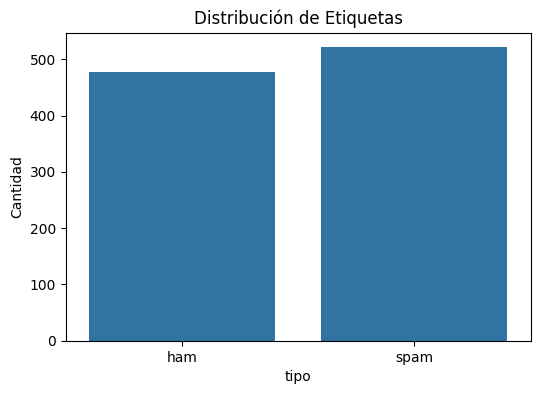

In [5]:
# Contar la cantidad de mensajes en cada categoría
label_counts = train_df['tipo'].value_counts()

# Mostrar la distribución de etiquetas
print(label_counts)

# Visualización de la distribución de etiquetas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='tipo', data=train_df)
plt.title('Distribución de Etiquetas')
plt.xlabel('tipo')
plt.ylabel('Cantidad')
plt.show()


4. Análisis de texto

4.1 Longitud de los mensajes

Vamos a añadir una nueva columna con la longitud de cada mensaje y visualizar esta longitud.

count    998.000000
mean      42.399800
std        9.232834
min       20.000000
25%       36.000000
50%       42.000000
75%       49.000000
max       73.000000
Name: longitud, dtype: float64


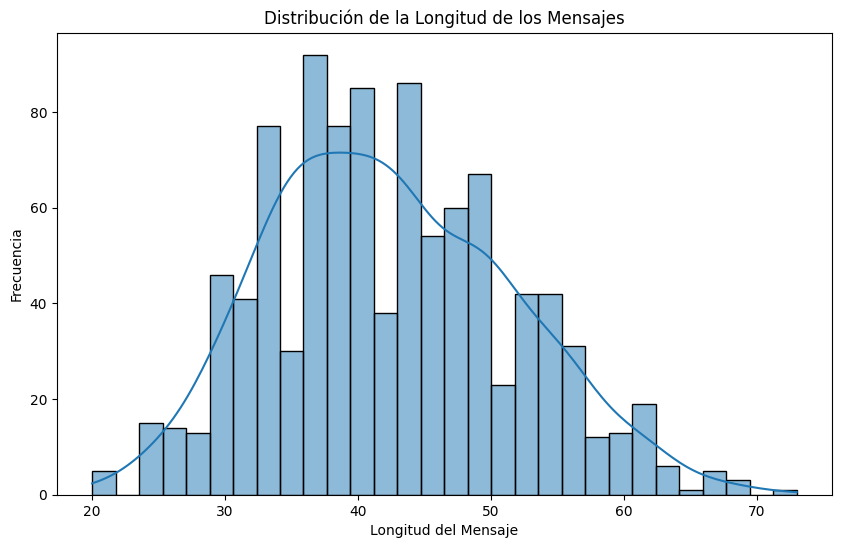

In [6]:
# Añadir una nueva columna con la longitud de cada mensaje
train_df['longitud'] = train_df['mensaje'].apply(len)

# Mostrar las estadísticas de la longitud de los mensajes
print(train_df['longitud'].describe())

# Visualización de la longitud de los mensajes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(train_df['longitud'], bins=30, kde=True)
plt.title('Distribución de la Longitud de los Mensajes')
plt.xlabel('Longitud del Mensaje')
plt.ylabel('Frecuencia')
plt.show()


Aquí podemos observar que la longitud de los mensajes varía entre 20 y 73 caracteres, con una media de aproximadamente 42 caracteres.

Continuemos con el análisis de palabras más frecuentes y la visualización de nubes de palabras.

4.2 Palabras más frecuentes en mensajes "spam" y "ham"

In [7]:
# Importar librerías necesarias para el análisis de texto
from collections import Counter
import re
from wordcloud import WordCloud

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = re.sub(r'\W', ' ', texto) # Eliminar caracteres no alfanuméricos
    texto = texto.lower() # Convertir a minúsculas
    texto = re.sub(r'\s+', ' ', texto) # Eliminar espacios extra
    return texto

# Limpiar los mensajes
train_df['mensaje_limpio'] = train_df['mensaje'].apply(limpiar_texto)

# Separar mensajes "spam" y "ham"
spam_text = ' '.join(train_df[train_df['tipo'] == 'spam']['mensaje_limpio'])
ham_text = ' '.join(train_df[train_df['tipo'] == 'ham']['mensaje_limpio'])

# Contar palabras más comunes
spam_palabras = Counter(spam_text.split())
ham_palabras = Counter(ham_text.split())

print("Palabras más comunes en mensajes 'spam':")
print(spam_palabras.most_common(10))

print("\nPalabras más comunes en mensajes 'ham':")
print(ham_palabras.most_common(10))


Palabras más comunes en mensajes 'spam':
[('de', 174), ('tu', 172), ('con', 152), ('nuestro', 90), ('este', 83), ('en', 80), ('un', 62), ('para', 59), ('gana', 56), ('a', 51)]

Palabras más comunes en mensajes 'ham':
[('tu', 298), ('de', 131), ('por', 113), ('gracias', 63), ('a', 62), ('en', 52), ('está', 44), ('tus', 42), ('un', 41), ('sido', 40)]


In [12]:
print("Palabras más comunes en mensajes 'spam':")
print(spam_palabras.most_common(30))

print("\nPalabras más comunes en mensajes 'ham':")
print(ham_palabras.most_common(30))

Palabras más comunes en mensajes 'spam':
[('de', 174), ('tu', 172), ('con', 152), ('nuestro', 90), ('este', 83), ('en', 80), ('un', 62), ('para', 59), ('gana', 56), ('a', 51), ('y', 44), ('tus', 39), ('gratis', 32), ('una', 29), ('el', 29), ('por', 27), ('la', 27), ('clic', 26), ('nuestra', 26), ('haz', 25), ('esta', 22), ('te', 22), ('obtén', 21), ('nuestras', 20), ('invierte', 17), ('necesitamos', 17), ('dinero', 16), ('obten', 16), ('descuento', 16), ('no', 16)]

Palabras más comunes en mensajes 'ham':
[('tu', 298), ('de', 131), ('por', 113), ('gracias', 63), ('a', 62), ('en', 52), ('está', 44), ('tus', 42), ('un', 41), ('sido', 40), ('y', 38), ('favor', 38), ('el', 38), ('con', 37), ('hola', 37), ('ha', 37), ('te', 34), ('que', 34), ('la', 33), ('para', 30), ('nuestro', 29), ('este', 25), ('cita', 23), ('es', 22), ('pago', 18), ('una', 18), ('aquí', 18), ('cuenta', 16), ('confirma', 15), ('recordatorio', 15)]


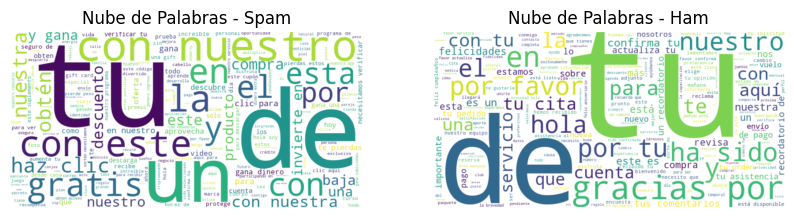

In [8]:
# Generar nubes de palabras
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Mostrar nubes de palabras
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Spam')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Ham')

plt.show()


1. Filtrado de palabras vacías (stopwords)
Las palabras vacías son palabras comunes que generalmente no aportan un significado relevante al análisis de texto, como artículos, preposiciones y conjunciones. Es importante filtrar estas palabras para centrarte en las palabras que podrían ser más informativas sobre el contenido de los mensajes 'spam' y 'ham'.

Primero, vamos a definir una lista de palabras vacías en español. Utilizaremos la lista proporcionada por nltk, una biblioteca popular para procesamiento de texto en Python.

In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_sp = stopwords.words('spanish')

# Agregar palabras adicionales que no aporten significado en este contexto específico
stopwords_sp.extend(['este', 'nuestro', 'con', 'para', 'esta'])  # Podemos ajustar esta lista según necesitemos

# Función para limpiar el texto y filtrar stopwords
def limpiar_texto_con_stopwords(texto):
    texto = re.sub(r'\W', ' ', texto) # Eliminar caracteres no alfanuméricos
    texto = texto.lower() # Convertir a minúsculas
    texto = re.sub(r'\s+', ' ', texto) # Eliminar espacios extra
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_sp]
    return ' '.join(palabras_filtradas)

# Aplicar limpieza con filtro de stopwords a los mensajes
train_df['mensaje_limpio_stopwords'] = train_df['mensaje'].apply(limpiar_texto_con_stopwords)

# Mostrar los mensajes limpios con filtrado de stopwords
print(train_df[['mensaje', 'mensaje_limpio_stopwords']].head(10))


                                           mensaje  \
0      Compra ahora y recibe un descuento especial   
1               Haz clic aqui para ganar un premio   
2                      Tu ordenador tiene un virus   
3            Descubre como perder peso rapidamente   
4                     Necesitas ayuda con tu tarea   
5              Gana dinero desde casa sin esfuerzo   
6        Reclama tu herencia de un pariente lejano   
7   Mejora tu rendimiento sexual con este producto   
8               Por favor responde a esta encuesta   
9  Invierte en esta oportunidad unica y hazte rico   

                 mensaje_limpio_stopwords  
0  compra ahora recibe descuento especial  
1              haz clic aqui ganar premio  
2                         ordenador virus  
3        descubre perder peso rapidamente  
4                   necesitas ayuda tarea  
5               gana dinero casa esfuerzo  
6        reclama herencia pariente lejano  
7      mejora rendimiento sexual producto  
8        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Análisis de Sentimiento
El análisis de sentimiento implica determinar la actitud emocional detrás de un texto, ya sea positiva, negativa o neutral. Para realizar un análisis básico de sentimiento, podemos utilizar técnicas como contar palabras positivas y negativas, o incluso entrenar un modelo de Machine Learning para clasificar los mensajes en categorías de sentimiento.

Aproximemos utilizando palabras clave para determinar sentimientos positivos y negativos en los mensajes.
En este código:

Definimos listas de palabras clave para sentimientos positivos y negativos.

Creamos una función analizar_sentimiento que cuenta las palabras positivas y negativas en cada mensaje y devuelve una etiqueta de sentimiento ('positivo', 'negativo', 'neutral') según el recuento.

Aplicamos esta función al DataFrame train_df para crear una nueva columna 'sentimiento'.

In [10]:
# Definir listas de palabras clave para sentimientos positivos y negativos
palabras_positivas = ['gana', 'felicitaciones', 'oportunidad', 'fácilmente', 'rico']
palabras_negativas = ['virus', 'problema', 'estafa', 'urgente', 'verificar']

# Función para analizar el sentimiento de un mensaje
def analizar_sentimiento(texto):
    palabras = texto.split()
    num_palabras_positivas = sum(1 for palabra in palabras if palabra in palabras_positivas)
    num_palabras_negativas = sum(1 for palabra in palabras if palabra in palabras_negativas)
    
    if num_palabras_positivas > num_palabras_negativas:
        return 'positivo'
    elif num_palabras_negativas > num_palabras_positivas:
        return 'negativo'
    else:
        return 'neutral'

# Aplicar análisis de sentimiento a los mensajes
train_df['sentimiento'] = train_df['mensaje_limpio_stopwords'].apply(analizar_sentimiento)

# Mostrar el resultado del análisis de sentimiento
print(train_df[['mensaje', 'sentimiento']].head(10))


                                           mensaje sentimiento
0      Compra ahora y recibe un descuento especial     neutral
1               Haz clic aqui para ganar un premio     neutral
2                      Tu ordenador tiene un virus    negativo
3            Descubre como perder peso rapidamente     neutral
4                     Necesitas ayuda con tu tarea     neutral
5              Gana dinero desde casa sin esfuerzo    positivo
6        Reclama tu herencia de un pariente lejano     neutral
7   Mejora tu rendimiento sexual con este producto     neutral
8               Por favor responde a esta encuesta     neutral
9  Invierte en esta oportunidad unica y hazte rico    positivo
